In [1]:
import geopandas as gpd
import pathlib
import matplotlib.pyplot as plt
# from src.constants import GWS_DATA_DIR

GWS_DATA_DIR = pathlib.Path("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity")

# Getting biotope data
bio_path = GWS_DATA_DIR / "chernobyl_habitat_data" / "Biotope_EUNIS_ver1.shp"
bio_data = gpd.read_file(bio_path)

# getting vegetation data
veg_path = GWS_DATA_DIR / "chernobyl_habitat_data" / "Vegetation_mape.shp"
veg_data = gpd.read_file(veg_path)

In [2]:
type(bio_data)
type(veg_data)

geopandas.geodataframe.GeoDataFrame

In [3]:
bio_data.head()

,OBJECTID,N_Eunis,Eunis_name,Shape_Leng,Shape_Area,Leg,AREA,geometry
0,44,C,Inland surface waters,1738.710883,77048.834598,1,7.70488,"POLYGON Z ((567349.222 5719076.917 0.000, 5673..."
1,45,C,Inland surface waters,33664.380335,329068.268246,1,32.90680,"POLYGON Z ((567359.453 5724545.845 0.000, 5673..."
2,46,C,Inland surface waters,1959.774812,92434.934227,1,9.24349,"POLYGON Z ((583966.896 5730868.298 0.000, 5840..."
3,47,C,Inland surface waters,3556.603641,851449.759888,1,85.14500,"POLYGON Z ((507999.789 5737888.108 0.000, 5079..."
4,48,C,Inland surface waters,4086.548341,888119.110061,1,88.81190,"POLYGON Z ((588941.960 5755636.366 0.000, 5896..."


In [4]:
veg_data.head()

,Vegetation,AREA,geometry
0,1,24.85380,"POLYGON Z ((547927.772 5710698.315 0.000, 5479..."
1,1,7.91757,"POLYGON Z ((550978.781 5711148.814 0.000, 5510..."
2,1,7.86063,"POLYGON Z ((594252.852 5711098.250 0.000, 5940..."
3,1,10.45270,"POLYGON Z ((595635.535 5712690.988 0.000, 5956..."
4,1,7.52688,"POLYGON Z ((595986.627 5712815.878 0.000, 5960..."


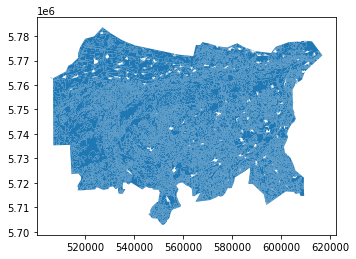

In [5]:
bio_data.plot();

## Geometries

In [6]:
bio_data['geometry'].head()

0    POLYGON Z ((567349.222 5719076.917 0.000, 5673...
1    POLYGON Z ((567359.453 5724545.845 0.000, 5673...
2    POLYGON Z ((583966.896 5730868.298 0.000, 5840...
3    POLYGON Z ((507999.789 5737888.108 0.000, 5079...
4    POLYGON Z ((588941.960 5755636.366 0.000, 5896...
Name: geometry, dtype: geometry

In [7]:
veg_data['geometry'].head()

0    POLYGON Z ((547927.772 5710698.315 0.000, 5479...
1    POLYGON Z ((550978.781 5711148.814 0.000, 5510...
2    POLYGON Z ((594252.852 5711098.250 0.000, 5940...
3    POLYGON Z ((595635.535 5712690.988 0.000, 5956...
4    POLYGON Z ((595986.627 5712815.878 0.000, 5960...
Name: geometry, dtype: geometry

In [8]:
# print the areas of the first 5 polygons:
selection = bio_data[0:5]

In [9]:
#print the area for each polygon
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print('Polygon area at index {0} is: {1:.3f}'.format(index, poly_area))

Polygon area at index 0 is: 77048.835
Polygon area at index 1 is: 329068.268
Polygon area at index 2 is: 92434.934
Polygon area at index 3 is: 851449.760
Polygon area at index 4 is: 888119.110


### Create a new column into GeoDataFrame calculating and storing the areas individual polygons

In [10]:
#Calculate the areas of polygons
bio_data['area'] = bio_data.area

In [11]:
bio_data['area'].head(2)

0     77048.834598
1    329068.268246
Name: area, dtype: float64

In [12]:
#Maximum area
max_area = bio_data["area"].max()

#Mean area
mean_area = bio_data['area'].mean()

print('Max area: %s\nMean are: %s'%(round(max_area, 2), round(mean_area, 2)))

Max area: 176039227.72
Mean are: 416709.54


## Map projection

In [13]:
bio_data.crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 24°E to 30°E - by country
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
veg_data.crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 24°E to 30°E - by country
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
#Converting the geonetries into Lambert Azimuthal Equal Area projection (EPSG: 3035)
# ETRS-LAEA projection.

#take a copy og the layer
bio_data_proj = bio_data.copy()

#Repeoject the geometries by replacing the values with projected ones
bio_data_proj = bio_data_proj.to_crs(epsg=3035)

In [16]:
bio_data_proj['geometry'].head()

0    POLYGON Z ((5551263.280 3320293.939 0.000, 555...
1    POLYGON Z ((5550006.802 3325644.334 0.000, 555...
2    POLYGON Z ((5564624.079 3335674.272 0.000, 556...
3    POLYGON Z ((5489413.275 3324937.941 0.000, 548...
4    POLYGON Z ((5563693.844 3361048.093 0.000, 556...
Name: geometry, dtype: geometry

In [17]:
#Convert the geometries to EPSG: 4326
bio_data_proj2 = bio_data.copy()
bio_data_proj2 = bio_data_proj2.to_crs(epsg=4326)

In [18]:
bio_data_proj2['geometry'].head()

0    POLYGON Z ((27.97281 51.61869 0.00000, 27.9727...
1    POLYGON Z ((27.97401 51.66785 0.00000, 27.9740...
2    POLYGON Z ((28.21562 51.72245 0.00000, 28.2165...
3    POLYGON Z ((27.11599 51.79180 0.00000, 27.1159...
4    POLYGON Z ((28.29400 51.94432 0.00000, 28.3036...
Name: geometry, dtype: geometry

EPSG:4326 (WGS84)
The World Geodetic System of 1984 is the geographic coordinate system (the three-dimensional one) used by GPS to express locations on the earth. WGS84 is the defined coordinate system for GeoJSON, as longitude and latitude in decimal degrees. For the most part, when you describe a lon/lat coordinate location, it’s based on the EPSG:4326 coordinate system. This is how we store data at Mapbox.



There is no way to visualize the WGS84 coordinate system on a two-dimensional plane (map), so most software programs project these coordinates using an equirectangular projection (Plate-Carrée) (Esri uses EPSG:54001).

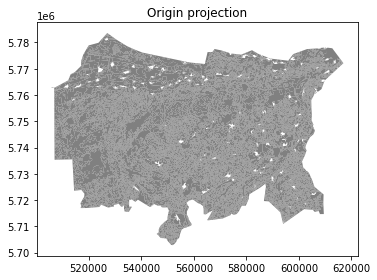

In [19]:
#plot the origin
bio_data.plot(facecolor='gray');

#Add title
plt.title('Origin projection');

#remove empty white space around the plot
plt.tight_layout()

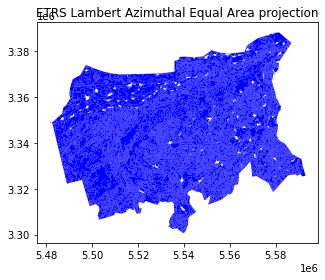

In [20]:
#plot the  one with ETRS-LAEA projection
bio_data_proj.plot(facecolor='blue');

#Add title
plt.title('ETRS Lambert Azimuthal Equal Area projection');

#remove empty white space around the plot
plt.tight_layout()

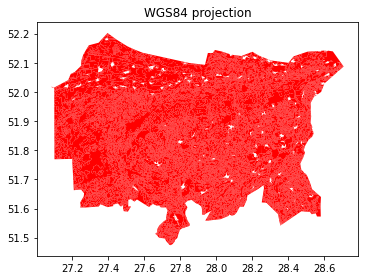

In [21]:
#plot the WGS84
bio_data_proj2.plot(facecolor='red');

#Add title
plt.title('WGS84 projection');

#remove empty white space around the plot
plt.tight_layout()

## OpenStreetMap of Chernobyl

In [22]:
import osmnx as ox

In [23]:
place_name = 'Chernobyl, Ukraine'

graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [24]:
import matplotlib.pyplot as plt

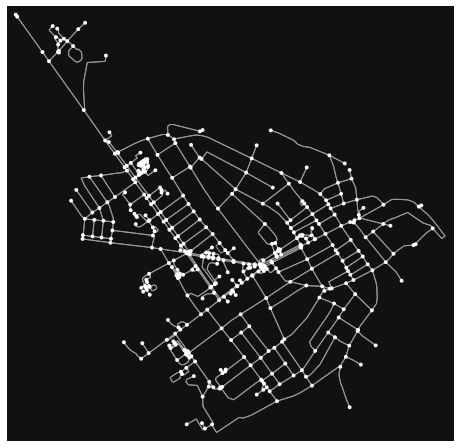

<Figure size 432x288 with 0 Axes>

In [25]:
#street network
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [26]:
area = ox.geocode_to_gdf(place_name)
buildings = ox.geometries_from_place(place_name, tags={'building':True})

type(area)
type(buildings)

geopandas.geodataframe.GeoDataFrame

In [27]:
#Extract the nodes and edges from the graph as GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph)

nodes.head()

/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,y,x,street_count,highway,geometry
osmid,,,,,
256247227,51.273195,30.216285,5,NaN,POINT (30.21628 51.27320)
313455001,51.276373,30.236834,3,NaN,POINT (30.23683 51.27637)
313455002,51.270136,30.219676,3,NaN,POINT (30.21968 51.27014)
1136103709,51.272625,30.221188,3,NaN,POINT (30.22119 51.27263)
1794682718,51.275768,30.213292,4,NaN,POINT (30.21329 51.27577)


In [28]:
edges.head()

/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid               name      highway maxspeed  \
u         v          key                                                       
256247227 4353723503 0     23652395      Кірова вулиця     tertiary       40   
          4353723497 0    269836186  Полупанова вулиця     tertiary      NaN   
          5914738051 0    584030474                NaN  residential      NaN   
          7221057017 0     23652395      Кірова вулиця     tertiary       40   
          2307046733 0    269836186  Полупанова вулиця     tertiary      NaN   

                          oneway   length  \
u         v          key                    
256247227 4353723503 0     False   20.335   
          4353723497 0     False   24.561   
          5914738051 0     False  106.481   
          7221057017 0     False  112.982   
          2307046733 0     False  192.666   

                                                                   geometry  \
u         v          key                                                      
256247227 4353723503 0    LINESTRING (30.21628 51.27320, 30.21610 51.27334)   
          4353723497 0    LINESTRING (30.21628 51.27320, 30.21662 51.27312)   
          5914738051 0    LINESTRING (30.21628 51.27320, 30.21495 51.27273)   
          7221057017 0    LINESTRING (30.21628 51.27320, 30.21678 51.272...   
          2307046733 0    LINESTRING (30.21628 51.27320, 30.21611 51.273...   

                         access tunnel service  
u         v          key                        
256247227 4353723503 0      NaN    NaN     NaN  
          4353723497 0      NaN    NaN     NaN  
          5914738051 0      NaN    NaN     NaN  
          7221057017 0      NaN    NaN     NaN  
          2307046733 0      NaN    NaN     NaN

/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


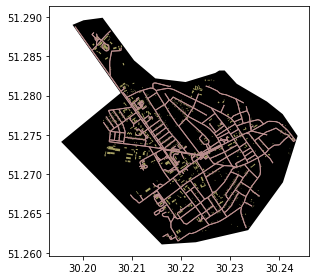

In [29]:
#Creates a map out of the streets, buildings, and the area Polygon but exclude the nodes
fig, ax = plt.subplots()

area.plot(ax=ax, facecolor='black')

edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

plt.tight_layout()

## Dissolve polygons

In [30]:
import os
import numpy as np
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import earthpy as et

/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style('darkgrid')

/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
bio_data.geom_type.head()

0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
dtype: object

In [33]:
bio_area = bio_data[['AREA', 'geometry']]
cont_cher = bio_area.dissolve(by='AREA')

#View the resulting geodataframe
cont_cher

,geometry
AREA,
8.125900e-08,"POLYGON Z ((566564.083 5747878.535 0.000, 5665..."
6.489120e-02,"POLYGON Z ((605941.550 5760273.496 0.000, 6059..."
4.308710e-01,"POLYGON Z ((610563.426 5778044.987 0.000, 6104..."
6.760850e-01,"POLYGON Z ((551074.814 5763771.511 0.000, 5510..."
8.170560e-01,"POLYGON Z ((543476.334 5770738.124 0.000, 5434..."
...,...
7.699380e+03,"POLYGON Z ((537295.501 5772000.142 0.000, 5373..."
8.327490e+03,"POLYGON Z ((541732.812 5754584.840 0.000, 5416..."
8.662600e+03,"POLYGON Z ((507135.354 5762041.878 0.000, 5071..."


In [34]:
cont_cher.reset_index()

/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AREA,geometry
0,8.125900e-08,"POLYGON Z ((566564.083 5747878.535 0.000, 5665..."
1,6.489120e-02,"POLYGON Z ((605941.550 5760273.496 0.000, 6059..."
2,4.308710e-01,"POLYGON Z ((610563.426 5778044.987 0.000, 6104..."
3,6.760850e-01,"POLYGON Z ((551074.814 5763771.511 0.000, 5510..."
4,8.170560e-01,"POLYGON Z ((543476.334 5770738.124 0.000, 5434..."
...,...,...
13510,7.699380e+03,"POLYGON Z ((537295.501 5772000.142 0.000, 5373..."
13511,8.327490e+03,"POLYGON Z ((541732.812 5754584.840 0.000, 5416..."
13512,8.662600e+03,"POLYGON Z ((507135.354 5762041.878 0.000, 5071..."
13513,1.681580e+04,"POLYGON Z ((601612.049 5771866.236 0.000, 6018..."


/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


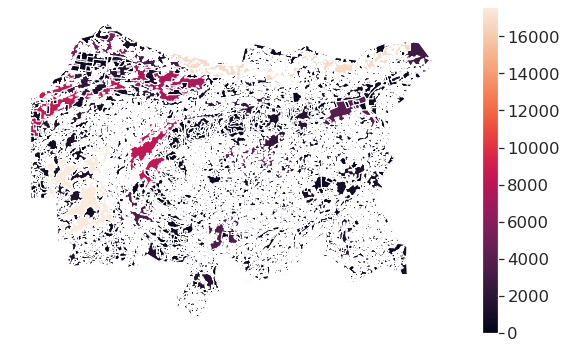

In [35]:
#Plot the data of AREA
fig, ax = plt.subplots(figsize=(10, 6))
cont_cher.reset_index().plot(column='AREA', legend=True, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.show()

## Dissolve and aggregate data: Eunis_name in bio_data

In [36]:
#select the colums that will retain the data
bio_boundary = bio_data[['Eunis_name', 'geometry', 'Shape_Leng', 'Shape_Area']]

#Then summarize the quantative columns by 'sum'
Eunis_agg = bio_data.dissolve(by='Eunis_name', aggfunc='sum')
Eunis_agg

/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,geometry,OBJECTID,Shape_Leng,Shape_Area,Leg,AREA,area
Eunis_name,,,,,,,
"Active, relatively undamaged raised bogs",MULTIPOLYGON Z (((550851.828 5707274.176 0.000...,7200,5.373121e+05,1.008129e+08,150,10081.296700,1.008129e+08
"Agriculturally-improved, re-seeded and heavily fertilised grassland, including sports fields and grass lawns",MULTIPOLYGON Z (((557927.970 5713307.819 0.000...,519165,3.025401e+06,5.879741e+08,2905,58797.397241,5.879741e+08
Anthropogenic herb stands,MULTIPOLYGON Z (((572321.374 5722353.719 0.000...,43011,1.994106e+05,1.907409e+07,243,1907.409520,1.907409e+07
Beds of large sedges normally without free-standing water,MULTIPOLYGON Z (((550053.933 5707836.876 0.000...,389025,3.996775e+06,5.915933e+08,2625,59159.307430,5.915933e+08
Boreal Labrador tea Scots pine bog woods,MULTIPOLYGON Z (((552770.054 5703965.413 0.000...,2681945,1.215576e+06,1.479338e+08,9412,14793.382950,1.479338e+08
Boreal cottonsedge Scots pine bog woods,MULTIPOLYGON Z (((546984.309 5706526.366 0.000...,3207860,1.578732e+06,1.750494e+08,11503,17504.938970,1.750494e+08
Boreal neutrocline sphagnum Scots pine fen woods,MULTIPOLYGON Z (((550970.513 5704174.615 0.000...,2122703,6.309290e+05,5.210957e+07,7744,5210.955320,5.210957e+07
Boreo-nemoral bilberry western spruce taiga,MULTIPOLYGON Z (((597950.812 5720257.732 0.000...,221410,6.031434e+04,4.039995e+06,672,403.999440,4.039995e+06
Boreo-nemoral small-herb western spruce taiga,MULTIPOLYGON Z (((580602.030 5725415.375 0.000...,15861,2.354731e+03,9.713118e+04,52,9.713120,9.713118e+04


/home/users/lyl1104/gtc-biodiversity/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

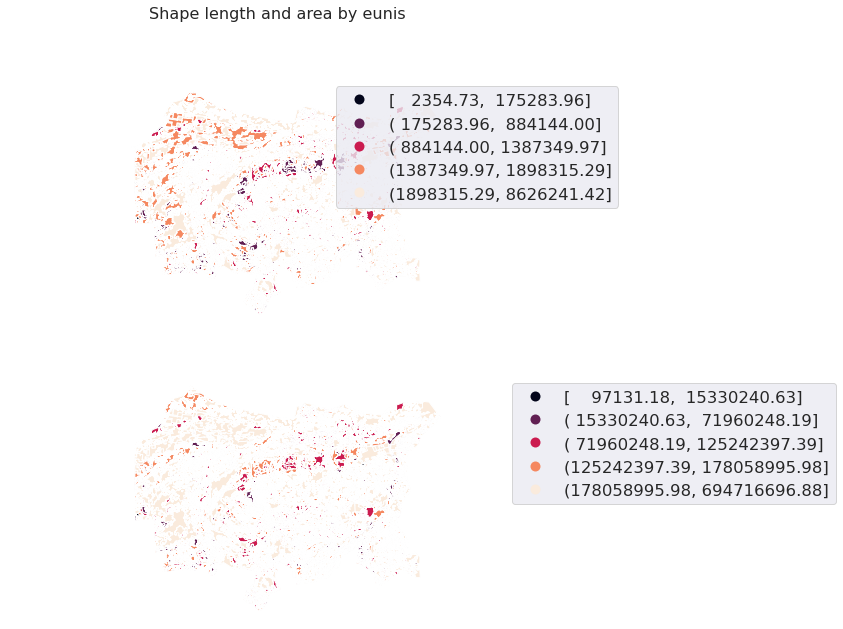

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

Eunis_agg.plot(column='Shape_Leng', legend=True, scheme='quantiles', ax=ax1)

Eunis_agg.plot(column='Shape_Area', legend=True, scheme='quantiles', ax=ax2)

plt.suptitle('Shape length and area by eunis', fontsize=16)
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show